K-means Clustering

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs



In [42]:
X,y = make_blobs(n_samples=300,centers = 4 ,cluster_std = 0.60 , random_state=0)
    
    

<function matplotlib.pyplot.show(close=None, block=None)>

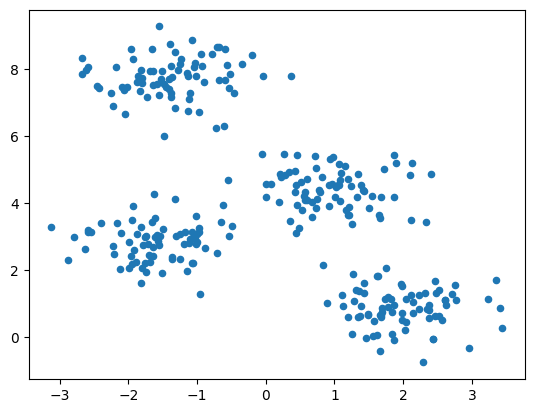

In [43]:
plt.scatter(X[:,0], X[:, 1],s =20)
plt.show

In [44]:
def initialize_centroids(X,k):
    
    indeks = np.random.choice(X.shape[0],size = k , replace=False)
    return X[indeks]


"""
np.random.choice = rastgele indeks seçimi yapmaya yardımcı olur
X.shape[0] = X listesinin şeklini ve boyutları hakkında bilgi verir.
replace = örnekleme tekrar edip etmeyeceğini belirtir.
"""
print("")
    
    

In [45]:
def assign_cluster(X,centroids):
    mesafe = np.sqrt(((X-centroids[:, np.newaxis])**2).sum(axis = 2))
    return np.argmin(mesafe , axis = 0)

"""
 * X - centroids[:, np.newaxis]: Bu işlem, her veri noktası ile her küme merkezi arasındaki farkı hesaplar. ;
    centroids[:, np.newaxis] ifadesi, centroids dizisini yeniden şekillendirerek (broadcasting) her veri noktası ;
    ile her küme merkezi arasındaki farkı hesaplamayı mümkün kılar.

 * (X - centroids[:, np.newaxis])**2: Her farkın karesini alır. Bu, Euclidean mesafenin bir parçasıdır.
 
 

 * sum(axis=2): Karesi alınmış farkları toplar. Bu, Euclidean mesafenin karesi olur.
 
 

 * np.sqrt(...): Karesi alınmış farkların toplamının karekökünü alır. Bu, Euclidean mesafeyi verir.
 
 
 
"""
print("")

In [46]:
def update_centroids(X,labels,k):
    new_centroids=  np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

In [47]:
def kmeans(X, k, max_iters = 100,tol = 1e-4):
    centroids = initialize_centroids(X,k)
    for i in range(max_iters):
        old_centroids = centroids
        labels = assign_cluster(X,centroids)
        centroids = update_centroids(X,labels,k)
        
        if np.all(np.abs(centroids - old_centroids) < tol):
            break
        
    return centroids,labels

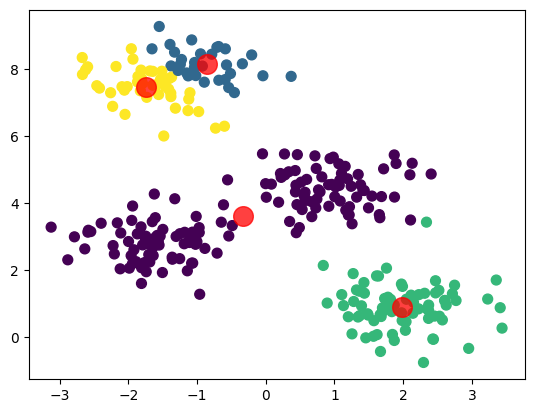

In [48]:
k = 4 
centroids, labels = kmeans(X,k)

plt.scatter(X[:, 0], X[:,1],c = labels , s=50 , cmap = "viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)
plt.show()


"""  
cmap Parametresi: Renklerin hangi renk haritasına göre seçileceğini belirtir. cmap='viridis' ifadesi, 
        veri noktalarının renklerinin viridis renk haritasına göre belirleneceğini belirtir.
        
"""
print("")